In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
data.shape

(2227, 3)

In [4]:
data['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [7]:
data['x1'].fillna(data['x1'].mean(),inplace=True)
data['x2'].fillna(data['x2'].mean(),inplace=True)

In [8]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [9]:
data.describe()

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.855697,2.981312e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-7.997687e+01,0.000000
50%,-9.124370,-1.000000e+00,0.000000
75%,59.633331,6.400540e+01,1.000000
max,134.508687,1.000000e+08,1.000000


<AxesSubplot:>

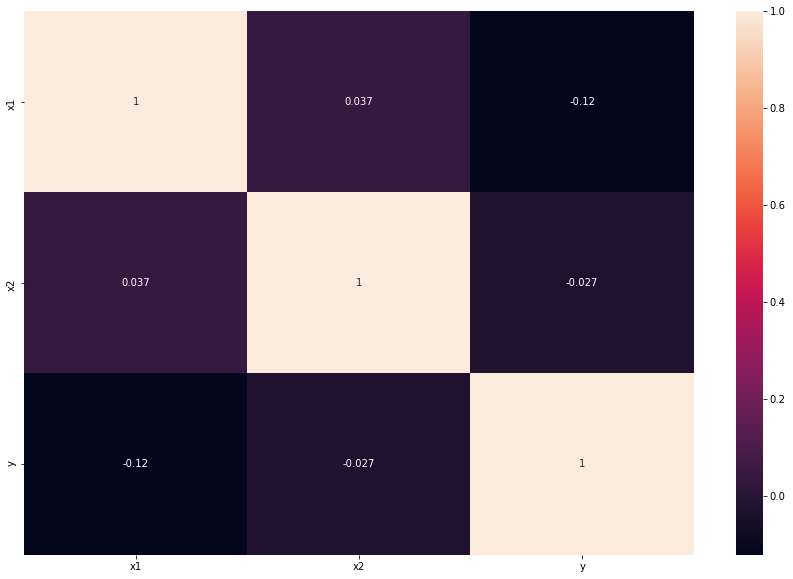

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

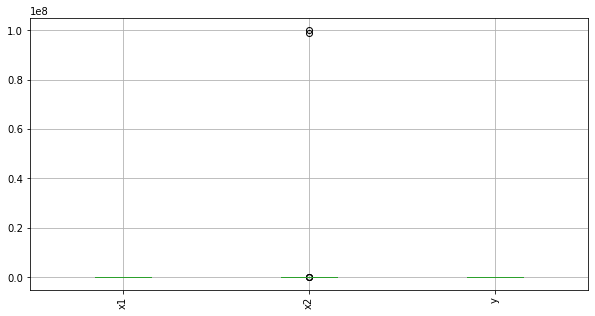

In [11]:
data.boxplot(figsize=[10,5])
plt.xticks(rotation=90)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in data.columns:
    if i!='y':
        data[i]=sc.fit_transform(data[[i]])

In [13]:
data.head()

,x1,x2,y
0,-1.530593,-0.029981,1
1,-1.286621,-0.029986,1
2,-1.676400,-0.029983,1
3,-1.468283,-0.029985,1
4,-1.530593,-0.029981,1


In [14]:
x=data.drop('y',1)
x.head()

,x1,x2
0,-1.530593,-0.029981
1,-1.286621,-0.029986
2,-1.676400,-0.029983
3,-1.468283,-0.029985
4,-1.530593,-0.029981


In [15]:
y=data.y

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1558, 2), (669, 2), (1558,), (669,))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

In [18]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('SVC',SVC()))


In [19]:
models

[('LogisticRegression', LogisticRegression()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('SVC', SVC())]

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [21]:
para_grid={
    'Logistic Regression': {'penalty': ('l1', 'l2'),
                             
                             },
    
    'knn':{'n_neighbors':[1,40]},
    
    'DecisionTreeClassifier':{"criterion":("gini", "entropy"), 
                              "splitter":("best", "random"), 
                              "max_depth":(list(range(1, 20))), 
                              "min_samples_split":[2, 3, 4], 
                              "min_samples_leaf":list(range(1, 20)) 
                             },
    
    'SVM' :  [{'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
              'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
              'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
             }]
}

In [22]:
def parameter(name,model,x_train,y_train):
    grid=GridSearchCV(model,para_grid,scoring='f1',cv=3)
    grid.fit(x_train,y_train)
    print('best_param',grid.best_params_)
    print('best_score',gird.best_score_)

In [23]:
def eval_metrics(target,prob,threshold):
        """ target =y_yest,prob=logistic.predict(x_test),Threshold =Cutoff Threshold """
        data=pd.DataFrame()
        data['pred_proba'] = pd.Series(prob)
        data['pred'] = data['pred_proba'].map(lambda x: 1.0 if x > threshold else 0.0)
        accuracy=metrics.accuracy_score(target,data['pred'])
        precision= metrics.precision_score(target,data['pred'])
        recall= metrics.recall_score(target,data['pred'])
        f1_score = metrics.f1_score(target,data['pred'])
        roc_auc = metrics.roc_auc_score(target,data['pred'])
        return(accuracy,precision,recall,f1_score,roc_auc)

In [24]:
def model_imp(x,y,model_list,th,gridsearch=False,cv_validation=True):
    #x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
    col_names = ['Algorithm', 'Accuracy','Precison','Recall','f1-score','AUC-ROC']
    results_final = pd.DataFrame(columns=col_names)
    i = 0
    for name,model in model_list:
        print('model',name)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        accuracy,precision,recall,f1_score,roc_auc=eval_metrics(y_test,pred_test,th)
        results_final.loc[i]=[name,accuracy,precision,recall,f1_score,roc_auc]
        i += 1
        
        
        if gridsearch:
            parameter(name,model,x_train,y_train)
            
        if cv_validation:
            score_cv = cross_val_score(estimator = model, X= x_train, y = y_train, cv = 10,scoring='accuracy')
            print(" K fold Cross validation scores",score_cv)
            print("Mean of K fold cross validation ",score_cv.mean())
       
   
    return(results_final)
            

In [25]:
model_imp(x_train,y_train,models,th=0.5,gridsearch=False,cv_validation=False)

model LogisticRegression
model KNeighborsClassifier
model DecisionTreeClassifier
model SVC


,Algorithm,Accuracy,Precison,Recall,f1-score,AUC-ROC
0,LogisticRegression,0.566517,0.563492,0.232026,0.328704,0.540255
1,KNeighborsClassifier,0.532138,0.486275,0.405229,0.442068,0.522174
2,DecisionTreeClassifier,0.958146,0.954248,0.954248,0.954248,0.957840
3,SVC,0.563528,0.549296,0.254902,0.348214,0.539297


## LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

0.5847240051347882
[[760 119]
 [528 151]]
0.5665171898355755
[[308  55]
 [235  71]]


## SVM WITH RBF

In [28]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_train_pred=svm.predict(x_train)
y_test_pred=svm.predict(x_test)

In [29]:
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

0.5905006418485238
[[745 134]
 [504 175]]
0.5635276532137519
[[299  64]
 [228  78]]


In [30]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
sv2=GridSearchCV(svm,tuned_parameters,cv=10,scoring='accuracy')
sv2.fit(x_train,y_train)
print(sv2.best_score_)

0.5641852770885029


In [33]:
print(sv2.best_params_)

{'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}


In [34]:
y_train_pred=sv2.predict(x_train)
y_test_pred=sv2.predict(x_test)

In [35]:
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

0.5641848523748395
0.5426008968609866
[[879   0]
 [679   0]]
[[363   0]
 [306   0]]


## SVM with Linear

In [36]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_train_pred=svm.predict(x_train)
y_test_pred=svm.predict(x_test)

In [37]:
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

0.5641848523748395
[[879   0]
 [679   0]]
0.5426008968609866
[[363   0]
 [306   0]]


## KNN 

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)

In [39]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))

1.0
0.5411061285500748
[[879   0]
 [  0 679]]
[[223 140]
 [167 139]]


In [40]:
error=[]
for i in range(3,50):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    y_train_pred=knn1.predict(x_train)
    y_test_pred=knn1.predict(x_test)
    error.append(i)

In [41]:
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))
print('_'*20)
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))


0.6001283697047497
[[684 195]
 [428 251]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       879
           1       0.56      0.37      0.45       679

    accuracy                           0.60      1558
   macro avg       0.59      0.57      0.57      1558
weighted avg       0.59      0.60      0.58      1558

____________________
0.5336322869955157
[[270  93]
 [219  87]]
              precision    recall  f1-score   support

           0       0.55      0.74      0.63       363
           1       0.48      0.28      0.36       306

    accuracy                           0.53       669
   macro avg       0.52      0.51      0.50       669
weighted avg       0.52      0.53      0.51       669



In [42]:
from sklearn.model_selection import cross_val_score
acc_rate=[]
for i in range(1,40):
    knn2=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn2,x_train,y_train,cv=10,scoring='accuracy')
    acc_rate.append(score.mean())


In [43]:
acc_rate

[0.5840570719602978,
 0.5718775847808105,
 0.5609263854425144,
 0.5673490488006616,
 0.5673614557485525,
 0.5738006617038874,
 0.5776344086021504,
 0.5891770057899091,
 0.5647684036393714,
 0.5788792390405294,
 0.579516129032258,
 0.5821050454921421,
 0.575682382133995,
 0.5795409429280397,
 0.5917204301075268,
 0.5929942100909844,
 0.5917204301075268,
 0.5910835401157982,
 0.5911166253101736,
 0.5949421009098428,
 0.5853101736972706,
 0.5859553349875932,
 0.5737510339123243,
 0.5718279569892473,
 0.5750330851943756,
 0.5731306865177832,
 0.5647684036393713,
 0.5712076095947063,
 0.5654218362282878,
 0.565413564929694,
 0.5628494623655914,
 0.5590033085194375,
 0.5654094292803971,
 0.5705293631100081,
 0.5615467328370554,
 0.5686104218362282,
 0.5589826302729529,
 0.5711703887510339,
 0.5596236559139784]

## DecisionTree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
dt1.fit(x_train,y_train)
y_train_pred=dt1.predict(x_train)
y_test_pred=dt1.predict(x_test)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

1.0
0.9551569506726457
[[879   0]
 [  0 679]]
[[349  14]
 [ 16 290]]


In [46]:
para={"criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
    
}

In [47]:
dt2=DecisionTreeClassifier(random_state=42)
tree=GridSearchCV(dt2, para, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree.fit(x_train,y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [48]:
aa=tree.best_params_
dt3=DecisionTreeClassifier(**aa)
dt3.fit(x_train,y_train)
y_train_pred=dt3.predict(x_train)
y_test_pred=dt3.predict(x_test)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

0.883183568677792
0.8699551569506726
[[863  16]
 [166 513]]
[[352  11]
 [ 76 230]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       0.84      0.98      0.90       879
           1       0.97      0.76      0.85       679

    accuracy                           0.88      1558
   macro avg       0.90      0.87      0.88      1558
weighted avg       0.90      0.88      0.88      1558



# observation

- According to All Models DecisionTree is the Best Model and Giving 90% accuracy
- LogisticRegression model giving only 56% accuracy
- SVM with Linear model giving only 56% accuracy and SVM with RBF model giving only 60% accuracy
- KNN giving only 60% accuracy
